<a href="https://colab.research.google.com/github/jpgarella/DRL-Solutions/blob/develop/DRL_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 Multi-armed Bandits




## Exercise 2.1  

In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon$ = 0.5, what is the probability that the greedy action is selected?

<br>

Answer: 
If $p$ is the probability to select the greedy action then $p = (1-\epsilon)1 + \frac{\epsilon}{2}$. So the probability that the greedy action is selected is 75%. 

## Exercise 2.2 Bandit example 

Consider a $k$-armed bandit problem with $k = 4$ actions, denoted $1$, $2$, $3$, and $4$. Consider applying to this problem a bandit algorithm using $\epsilon$-greedy action selection, sample-average action-value estimates, and initial estimates of $Q_1(a) = 0$, for all $a$. Suppose the initial sequence of actions and rewards is $A1 = 1$, $R_1 =-1$, $A_2 =2$, $R_2 =1$, $A_3 =2$, $R_3 =-2$, $A_4 =2$, $R_4 =2$, $A_5 =3$, $R_5 =0$. On some of these time steps the $\epsilon$ case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

<br>

Answer:



| Q | | A | R |definitely $\epsilon$ case  |possibly $\epsilon$ case |
|---|--------|-----|--|---|---|
|  $$Q_1 = $$|$$  [0,0,0,0] $$| $$A_1 = 1$$  |$$R_1 =-1$$ | $False$|$True$ |
|  $$Q_2 =$$|$$ [-1,0,0,0]$$ | $$A_2 = 2$$  |$$R_2 =1$$ | $False$|$True$ |
|  $$Q_3 = $$|$$ [-1,1,0,0]$$ | $$A_3 = 2$$  |$$R_3 =-2$$ | $False$|$True$ |
|  $$Q_4 = $$|$$ [-1,-1/2,0,0]$$| $$A_4 = 2$$  |$$R_4 =2$$ | $True$|$False$ |
|  $$Q_5 = $$|$$ [-1,1/3,0,0]$$ | $$A_5 = 3$$  |$$R_5 =0$$ | $True$|$False$ |
|  $$Q_6 = $$|$$ [-1,1/3,0,0]$$  | | | 

<br>
Subindex denote time step t




## Excercise 2.3 *wip*

In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

<br>

Answer:

Probability of selecting the best action in the long run is  $p = (1-\epsilon)1 + \frac{\epsilon}{10}$

With $\epsilon = 0,01$ the probability of selecting the best action in the long run is  $99,1%$.

With $\epsilon = 0,1$ the probability of selecting the best action in the long run is  $91%$ 

<br>

Variable definitions:

$A_t$: action selected at  time step $t$

$R_t$: reward corresponding to $A_t$

$q_*(a) = \mathbf{E} \left[R_t / A_t=a\right]$ : Expected reward given a is selected 

$Q_t(a)$: Estimated value of action a at time step $t$






In [0]:
#check python version and dependencies installed 
#!python --version
#!pip list 

In [0]:
# import dependencies  
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def action_selection(epsilon,k,Q):
  """
  Returns an integer between 0 and k-1.
  """
  random_action = True if np.random.rand() < epsilon else False


  if random_action:
      action = np.random.randint(0, high=k-1)
  else:
      action = np.argmax(Q)
    
  return action

def  bandit(mu, sigma):
  return sigma * np.random.randn() + mu


def updateQ(a,r,Q,N,method = "sample_average"):

  if method == "sample_average":
    Q[a] = Q[a] + 1/float(N[a]) * (r - Q[a])
    return Q
  
def is_optimal_action(a,q):
    
    if ( a == np.argmax(q)):# or Q[a] == Q[np.argmax(Q)]):
      return 1  
    else:
      return 0 



In [0]:
# mean and standard deviation
mu, sigma = 0, 1
mu0, sigma0 = 0, 1
sigma_bandit = 1

# define variables
k = 10
steps= 2000
independent_runs = 2000
alpha = 0.1
epsilons = [0,0.01, 0.1]

In [0]:
# The 10-armed Testbed

# Initialization
q_ir_e = []
Q_ir_e = []
R_ir_e = []
N_ir_e = []
A_ir_e = []
O_ir_e = []

for e in range(len(epsilons)):

  epsilon = epsilons[e]

  q_ir = []
  Q_ir = []
  R_ir = []
  N_ir = []
  A_ir = []
  O_ir = []
  for ir in range(independent_runs):  

    #log status 
    if ((ir % 100) == 0):
        print("------ " + str(ir) + " / "+ str(independent_runs) + " ------")
        
    # Initialization
    # q = np.ones(k) * np.random.normal(mu0, sigma0) # Initialize expected reward given a is selected: q (equal to all actions) 

    q = sigma0 * np.random.randn(k) + mu0  # Initialize expected reward given a is selected: q (equal to all actions) 
    Q = np.zeros(k) # Initialize estimated value of action: Q (equal to all actions)
    R = []
    N = np.zeros(k)
    A = []
    O = []
    # Loop
    for i in range(steps):

      #epsilon-greedy action selection
      a = action_selection(epsilon,k,Q)
      A.append(a)
      r = bandit(q[a], sigma_bandit)  
      R.append(r)
      N[a]+=1
      o = is_optimal_action(a,q)
      O.append(o)
      Q = updateQ(a,r,Q,N,method = "sample_average")

      # q_a incremental update per step 
      # q_t_step_increment = np.random.normal(mu, sigma, k)
      # q_t = q_t + q_t_step_increment

    q_ir.append(q)
    Q_ir.append(Q)
    R_ir.append(np.array(R))
    N_ir.append(N)
    A_ir.append(np.array(A))
    O_ir.append(np.array(O))
    
  q_ir_e.append(np.array(q_ir))
  Q_ir_e.append(np.array(Q_ir))
  R_ir_e.append(np.array(R_ir))
  N_ir_e.append(np.array(N_ir))
  A_ir_e.append(np.array(A_ir))
  O_ir_e.append(np.array(O_ir))
    

------ 0 / 2000 ------
------ 100 / 2000 ------
------ 200 / 2000 ------
------ 300 / 2000 ------
------ 400 / 2000 ------
------ 500 / 2000 ------
------ 600 / 2000 ------
------ 700 / 2000 ------
------ 800 / 2000 ------
------ 900 / 2000 ------
------ 1000 / 2000 ------
------ 1100 / 2000 ------
------ 1200 / 2000 ------
------ 1300 / 2000 ------
------ 1400 / 2000 ------
------ 1500 / 2000 ------
------ 1600 / 2000 ------
------ 1700 / 2000 ------
------ 1800 / 2000 ------
------ 1900 / 2000 ------
------ 0 / 2000 ------
------ 100 / 2000 ------
------ 200 / 2000 ------
------ 300 / 2000 ------
------ 400 / 2000 ------
------ 500 / 2000 ------
------ 600 / 2000 ------
------ 700 / 2000 ------
------ 800 / 2000 ------
------ 900 / 2000 ------
------ 1000 / 2000 ------
------ 1100 / 2000 ------
------ 1200 / 2000 ------
------ 1300 / 2000 ------
------ 1400 / 2000 ------
------ 1500 / 2000 ------
------ 1600 / 2000 ------
------ 1700 / 2000 ------
------ 1800 / 2000 ------
------ 190

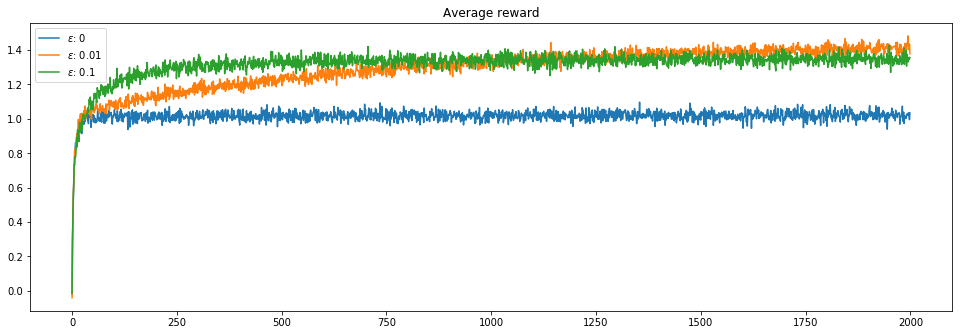

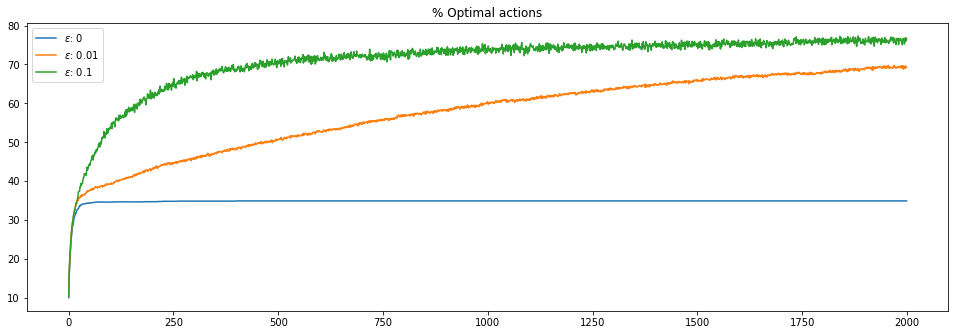

In [0]:
fig= plt.figure(figsize=(16,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(steps), R_ir_e[0].mean(0))
axes.plot(range(steps), R_ir_e[1].mean(0))
axes.plot(range(steps), R_ir_e[2].mean(0))
axes.legend(('$\epsilon$: ' + str(epsilons[0]), '$\epsilon$: ' + str(epsilons[1]), '$\epsilon$: ' + str(epsilons[2]) ))
plt.title('Average reward')
plt.show()

fig= plt.figure(figsize=(16,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(steps), O_ir_e[0].mean(0)*100)
axes.plot(range(steps), O_ir_e[1].mean(0)*100)
axes.plot(range(steps), O_ir_e[2].mean(0)*100)
axes.legend(('$\epsilon$: ' + str(epsilons[0]), '$\epsilon$: ' + str(epsilons[1]), '$\epsilon$: ' + str(epsilons[2]) ))
plt.title('% Optimal actions')
plt.show()


## Exercise 2.4 

If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

<br>

$$Q_{n+1} = Q_n +   \alpha_n(R_n - Q_n)$$

Then: 

$$Q_{n+1} = \alpha_n R_n  +   (1-\alpha_n)Q_n$$

$$Q_{n+1} = \alpha_n R_n  +   (1-\alpha_n)(\alpha_{n-1} R_{n-1}  +   (1-\alpha_{n-1})Q_{n-1})$$

$$Q_{n+1} = \alpha_n R_n  +   \alpha_{n-1}(1-\alpha_n)R_{n-1}  +  (1-\alpha_n) (1-\alpha_{n-1})Q_{n-1}$$

$$Q_{n+1} = \alpha_n R_n  + \alpha_{n-1}(1-\alpha_n)R_{n-1}  +  \alpha_{n-2}(1-\alpha_{n})(1-\alpha_{n-1})R_{n-2} +  \cdots +  \alpha_{1} (1-\alpha_{n})(1-\alpha_{n-1})\cdots(1-\alpha_{2})R_1 + (1-\alpha_{n})(1-\alpha_{n-1})\cdots(1-\alpha_{1})Q_1 $$

<br>
Solution: 

$$ Q_{n+1} = \left( \sum_{j=1}^{n-1} \left[ \prod_{i=j+1}^{n} (1-\alpha_i)\right] \alpha_j R_j \right) + \alpha_n R_n + \prod_{j=1}^{n} (1-\alpha_i) Q_1$$

<br>

If $\forall n$  $\alpha_n = \alpha $, then:

$$ Q_{n+1} = \left(\sum_{j=1}^{n-1} \left[ \prod_{i=j+1}^{n} (1-\alpha)\right] \alpha R_j \right)+ \alpha R_n + \prod_{j=1}^{n} (1-\alpha) Q_1$$
$$ Q_{n+1} = \left( \sum_{j=1}^{n-1}  (1-\alpha)^{n-j}  \alpha R_j \right)+ \alpha R_n +  (1-\alpha)^n Q_1$$
$$ Q_{n+1} = \left( \sum_{j=1}^{n}  (1-\alpha)^{n-j}  \alpha R_j \right) +  (1-\alpha)^n Q_1$$

$$LQQD$$








## Exercise 2.5 (programming) 
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.








In [0]:
# import dependencies  
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def action_selection(epsilon,k,Q):
  """
  Returns an integer between 0 and k-1.
  """
  random_action = True if np.random.rand() < epsilon else False


  if random_action:
      action = np.random.randint(0, high=k-1)
  else:
      action = np.argmax(Q)
    
  return action

def  bandit(mu, sigma):
  return sigma * np.random.randn() + mu


def updateQ(a, r, Q, N, var = 0.1, method = "sample_average"):

  if method == "sample_average":
    Q[a] = Q[a] + 1/float(N[a]) * (r - Q[a])
    return Q

  if method == "constant":
    Q[a] = Q[a] + var * (r - Q[a])
    return Q

def is_optimal_action(a,q):
    
    if ( a == np.argmax(q)):# or Q[a] == Q[np.argmax(Q)]):
      return 1  
    else:
      return 0 



In [0]:
# mean and standard deviation
mu0, sigma0 = 0, 1
mu, sigma = 0, 0.01
sigma_bandit = 1

# define variables
k = 10
steps= 5000
independent_runs = 2000
alpha = 0.1 
epsilon = 0.1

In [0]:
# The 10-armed Testbed

def armed_testbed(k=10, var=0.1, method="sample_average", epsilon=0.1):

    q_ir = []
    Q_ir = []
    R_ir = []
    N_ir = []
    A_ir = []
    O_ir = []

    for ir in range(independent_runs):  

      #log status 
      if ((ir % 100) == 0):
          print("------ " + str(ir) + " / "+ str(independent_runs) + " ------")

      # Initialization

      q = np.ones(k) * (sigma0 * np.random.randn() + mu0) #Initialize expected reward given a is selected: q (equal to all actions)  
      Q = np.zeros(k) # Initialize estimated value of action: Q (equal to all actions)
      R = []
      N = np.zeros(k)
      A = []
      O = []
      # Loop
      for i in range(steps):

        #epsilon-greedy action selection
        a = action_selection(epsilon,k,Q)
        A.append(a)
        r = bandit(q[a], sigma_bandit)  
        R.append(r)
        N[a]+=1
        o = is_optimal_action(a,q)
        O.append(o)
        Q = updateQ(a, r, Q, N, method = method, var = 0.1)

        # q_a incremental update per step 
        q_step_increment = np.random.normal(mu, sigma, k)
        q = q + q_step_increment

      q_ir.append(q)
      Q_ir.append(Q)
      R_ir.append(np.array(R))
      N_ir.append(N)
      A_ir.append(np.array(A))
      O_ir.append(np.array(O))
    
    return np.array(q_ir), np.array(Q_ir), np.array(R_ir), np.array(N_ir), np.array(A_ir), np.array(O_ir)
    

In [0]:
q1, Q1, R1, N1, A1, O1 = armed_testbed(k=10, method="sample_average")
q2, Q2, R2, N2, A2, O2 = armed_testbed(k=10, var=alpha, method="constant")

------ 0 / 2000 ------
------ 100 / 2000 ------


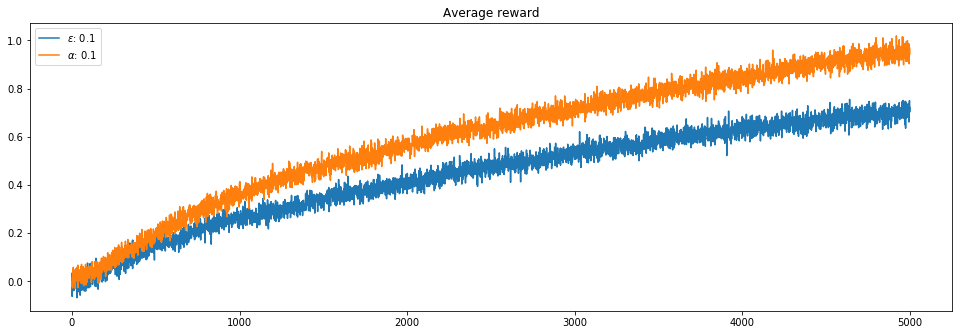

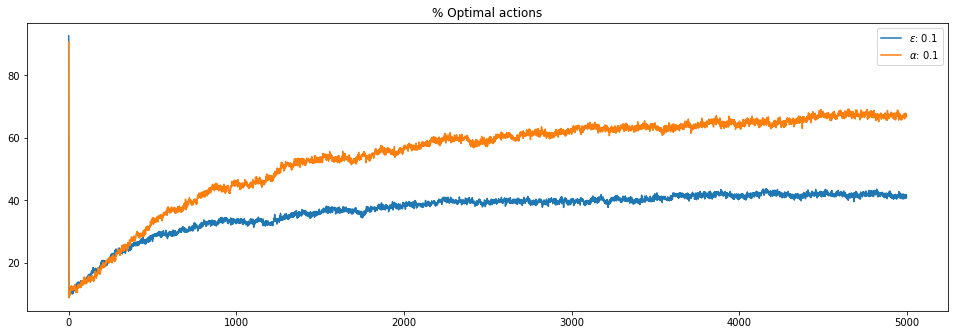

In [0]:
fig= plt.figure(figsize=(16,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(steps), R1.mean(0))
axes.plot(range(steps), R2.mean(0))
axes.legend((r'$\epsilon$: ' + str(epsilons[0]), r'$\alpha$: ' + str(alpha) ))
plt.title('Average reward')
plt.show()

fig= plt.figure(figsize=(16,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(steps), O1.mean(0)*100)
axes.plot(range(steps), O2.mean(0)*100)
axes.legend(( r'$\epsilon$: ' + str(epsilons[0]), r'$\alpha$: ' + str(alpha) ))
plt.title('% Optimal actions')
plt.show()


It can be seen that the sample_average method achieves less performance that the other one which uses a constant step-size parameter, $\alpha = 0.1$

## Exercise 2.6: Mysterious Spikes wip

The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

Answer:



In [0]:
# import dependencies  
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def action_selection(epsilon,k,Q):
  """
  Returns an integer between 0 and k-1.
  """
  random_action = True if np.random.rand() < epsilon else False


  if random_action:
      action = np.random.randint(0, high=k-1)
  else:
      action = np.argmax(Q)
    
  return action

def  bandit(mu, sigma):
  return sigma * np.random.randn() + mu


def updateQ(a, r, Q, N, var = 0.1, method = "sample_average"):

  if method == "sample_average":
    Q[a] = Q[a] + 1/float(N[a]) * (r - Q[a])
    return Q

  if method == "constant":
    Q[a] = Q[a] + var * (r - Q[a])
    return Q

def is_optimal_action(a,q):
    
    if ( a == np.argmax(q)):# or Q[a] == Q[np.argmax(Q)]):
      return 1  
    else:
      return 0 



In [0]:
# mean and standard deviation
mu0, sigma0 = 0, 1
mu, sigma = 0, 1
sigma_bandit = 1

# define variables
k = 10
steps= 5000
independent_runs = 2000
alpha = 0.1
epsilons = [0.1, 0.01]

In [0]:
# The 10-armed Testbed

def armed_testbed(k=10, var=0.1, method="sample_average"):

    q_ir = []
    Q_ir = []
    R_ir = []
    N_ir = []
    A_ir = []
    O_ir = []

    for ir in range(independent_runs):  

      #log status 
      if ((ir % 100) == 0):
          print("------ " + str(ir) + " / "+ str(independent_runs) + " ------")

      # Initialization

      q = np.ones(k) * (sigma0 * np.random.randn() + mu0) #Initialize expected reward given a is selected: q (equal to all actions)  
      Q = np.zeros(k) # Initialize estimated value of action: Q (equal to all actions)
      R = []
      N = np.zeros(k)
      A = []
      O = []
      # Loop
      for i in range(steps):

        #epsilon-greedy action selection
        a = action_selection(epsilon,k,Q)
        A.append(a)
        r = bandit(q[a], sigma_bandit)  
        R.append(r)
        N[a]+=1
        o = is_optimal_action(a,q)
        O.append(o)
        Q = updateQ(a, r, Q, N, method = method, var = 0.1)

        # q_a incremental update per step 
        #q_step_increment = np.random.normal(mu, sigma, k)
        #q = q + q_step_increment

      q_ir.append(q)
      Q_ir.append(Q)
      R_ir.append(np.array(R))
      N_ir.append(N)
      A_ir.append(np.array(A))
      O_ir.append(np.array(O))
    
    return np.array(q_ir), np.array(Q_ir), np.array(R_ir), np.array(N_ir), np.array(A_ir), np.array(O_ir)
    

In [0]:
q1, Q1, R1, N1, A1, O1 = armed_testbed(k=10, method="sample_average")
q2, Q2, R2, N2, A2, O2 = armed_testbed(k=10, var=alpha, method="constant")

------ 0 / 2000 ------
------ 100 / 2000 ------
------ 200 / 2000 ------
------ 300 / 2000 ------
------ 400 / 2000 ------
------ 500 / 2000 ------
------ 600 / 2000 ------
------ 700 / 2000 ------
------ 800 / 2000 ------
------ 900 / 2000 ------
------ 1000 / 2000 ------
------ 1100 / 2000 ------
------ 1200 / 2000 ------
------ 1300 / 2000 ------
------ 1400 / 2000 ------
------ 1500 / 2000 ------
------ 1600 / 2000 ------
------ 1700 / 2000 ------
------ 1800 / 2000 ------
------ 1900 / 2000 ------
------ 0 / 2000 ------
------ 100 / 2000 ------
------ 200 / 2000 ------
------ 300 / 2000 ------
------ 400 / 2000 ------
------ 500 / 2000 ------
------ 600 / 2000 ------
------ 700 / 2000 ------
------ 800 / 2000 ------
------ 900 / 2000 ------
------ 1000 / 2000 ------
------ 1100 / 2000 ------
------ 1200 / 2000 ------
------ 1300 / 2000 ------
------ 1400 / 2000 ------
------ 1500 / 2000 ------
------ 1600 / 2000 ------
------ 1700 / 2000 ------
------ 1800 / 2000 ------
------ 190

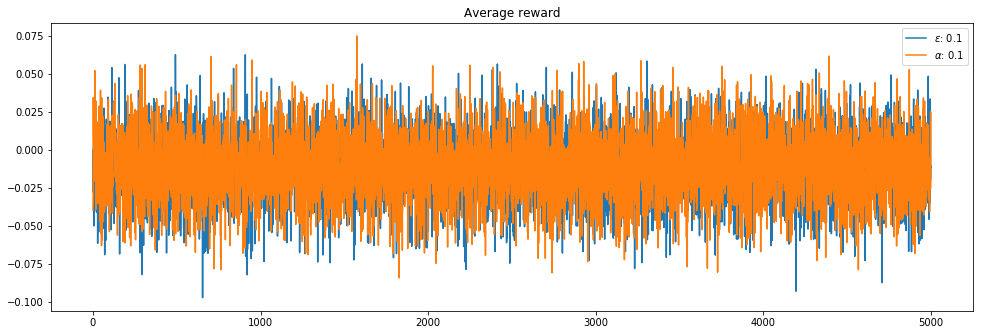

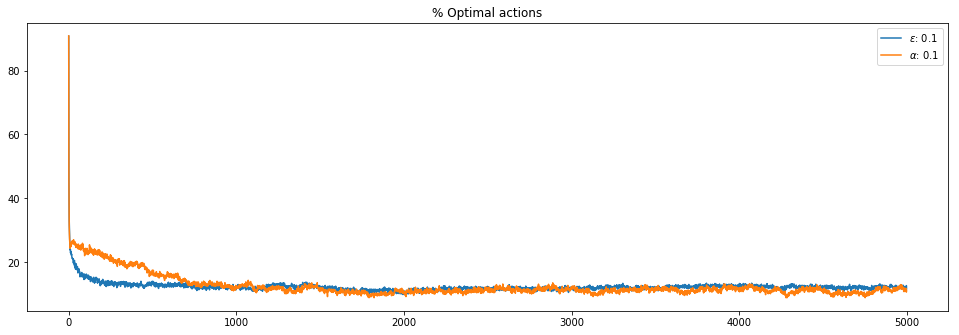

In [0]:
fig= plt.figure(figsize=(16,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(steps), R1.mean(0))
axes.plot(range(steps), R2.mean(0))
axes.legend((r'$\epsilon$: ' + str(epsilons[0]), r'$\alpha$: ' + str(alpha) ))
plt.title('Average reward')
plt.show()

fig= plt.figure(figsize=(16,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(steps), O1.mean(0)*100)
axes.plot(range(steps), O2.mean(0)*100)
axes.legend(( r'$\epsilon$: ' + str(epsilons[0]), r'$\alpha$: ' + str(alpha) ))
plt.title('% Optimal actions')
plt.show()


## Exercise 2.7: Unbiased Constant-Step-Size Trick

Answer:

$$ Q_{n+1} = \left( \sum_{j=1}^{n-1} \left[ \prod_{i=j+1}^{n} (1-\beta_i)\right] \beta_j R_j \right) + \beta_n R_n + \prod_{j=1}^{n} (1-\beta_i) Q_1$$

Then:
$$\prod_{j=1}^{n} (1-\beta_i) Q_1 = (1-\beta_1)(1-\beta_2)\cdots(1-\beta_n)$$


As:

$$(1-\beta_1) = (1-\alpha/o_1)$$ 
$$ = (1-\alpha/\alpha) $$
$$= 1-1 $$ $$=0$$ 

Then, 

$$\prod_{j=1}^{n} (1-\beta_i) Q_1 = 0 $$

$$LQQD$$

## Exercise 2.8: UCB Spikes wip

Answer: